In [1]:
import numpy as np

from pathlib import Path

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [2]:
# Load and flatten
data_path = Path(("/home/jovyan/work/CNN Test with Raman/Dataset"
                  "/cells-raman-spectra/dataset_i"))
datasets = data_path.rglob("*.csv")

x_data = [] # Input data, 100cm^-1, 101cm^-1, ..., 2080cm^-1
y_data = [] # Output label,

for item in datasets:
    data = np.loadtxt(item, comments='#', delimiter=',') # size (54, 2090)
    x_data.append(data)
    
    for row in data:
        y_data.append(item.parent.stem.split("-")[0])
x_data = np.concatenate(x_data)

x_data_raw = np.copy(x_data)
y_data_raw = np.copy(y_data)

In [3]:
print(x_data_raw.shape)
print(y_data_raw)

(1928, 2090)
['A' 'A' 'A' ... 'ZAM' 'ZAM' 'ZAM']


In [4]:
# Categories to numbers
le = LabelEncoder()
le.fit(y_data)

classes = le.classes_
print(le.classes_)
num_classes = len(classes)

y_data = le.transform(y_data_raw)

print(le.transform(["A", "DMEM", "G", "HF", "MEL", "ZAM"]))

['A' 'DMEM' 'G' 'HF' 'MEL' 'ZAM']
[0 1 2 3 4 5]


In [5]:
# Numbers to one-hot
y_data = to_categorical(y_data, num_classes)
print(y_data[:5])

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [6]:
# Split into test and training data
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size=.2)

In [7]:
# Check it's worked
print("First 5 traning labels as one-hot encoded vectors:\n",
     y_train[:5])
# Decode
print(le.inverse_transform([np.argmax(train) for train in y_train[:5]]))

First 5 traning labels as one-hot encoded vectors:
 [[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
['DMEM' 'ZAM' 'MEL' 'DMEM' 'A']


In [35]:
input_shape = 2090

model = Sequential()
model.add(Dense(units=256, activation='sigmoid', input_shape=(input_shape,)))
model.add(Dense(units=64, activation='sigmoid'))
model.add(Dense(units=32, activation='sigmoid'))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               535296    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 198       
Total params: 554,022
Trainable params: 554,022
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy']) # Remember this depends on the loss and optimizer
history = model.fit(x_train,
                    y_train,
                    batch_size=128,
                    epochs=50,
#                     verbose=False,
                    validation_split=0.1) # 10% Validation
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)

Train on 1387 samples, validate on 155 samples
Epoch 1/50
1387/1387 [==============================] - 1s 442us/sample - loss: 1.9143 - acc: 0.1514 - val_loss: 1.7927 - val_acc: 0.1742
Epoch 2/50
1387/1387 [==============================] - 0s 194us/sample - loss: 1.7990 - acc: 0.2019 - val_loss: 1.7761 - val_acc: 0.1419
Epoch 3/50
1387/1387 [==============================] - 0s 189us/sample - loss: 1.7666 - acc: 0.1939 - val_loss: 1.7677 - val_acc: 0.2000
Epoch 4/50
1387/1387 [==============================] - 0s 205us/sample - loss: 1.7524 - acc: 0.3064 - val_loss: 1.7540 - val_acc: 0.2129
Epoch 5/50
1387/1387 [==============================] - 0s 198us/sample - loss: 1.7288 - acc: 0.3216 - val_loss: 1.7218 - val_acc: 0.3548
Epoch 6/50
1387/1387 [==============================] - 0s 201us/sample - loss: 1.6952 - acc: 0.3800 - val_loss: 1.6778 - val_acc: 0.4065
Epoch 7/50
1387/1387 [==============================] - 0s 203us/sample - loss: 1.6547 - acc: 0.3691 - val_loss: 1.6307 - val

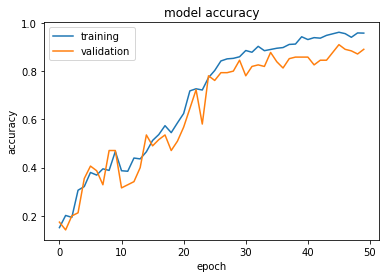

Test loss: 0.412
Test accuracy: 0.907


In [37]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [38]:
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# input_shape = 28*28
# x_train = x_train.reshape(x_train.shape[0], input_shape)
# x_test = x_test.reshape(x_test.shape[0], input_shape)

predictions = model.predict(x_test)
print(predictions)
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

page = 0

[[4.44801146e-04 3.15862009e-03 1.42136708e-01 5.23344427e-03
  7.08671391e-01 1.40355021e-01]
 [2.32094410e-03 6.71777502e-02 1.08515304e-02 7.18315085e-03
  2.07965031e-01 7.04501569e-01]
 [2.44691465e-02 3.48639768e-03 1.09065279e-01 8.12918782e-01
  2.81378888e-02 2.19224468e-02]
 ...
 [2.25481298e-02 1.12276722e-03 4.19247001e-02 9.26366568e-01
  4.51573590e-03 3.52208107e-03]
 [3.72156990e-03 7.12835055e-04 6.36235535e-01 2.19466403e-01
  1.19639196e-01 2.02244204e-02]
 [7.88733596e-04 1.63471399e-04 8.19296062e-01 4.23614979e-02
  1.29394129e-01 7.99602177e-03]]


In [39]:
le.inverse_transform([np.argmax(predictions[0])])[0]

'MEL'

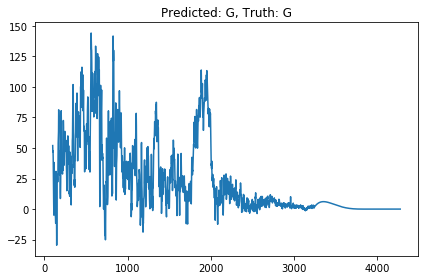

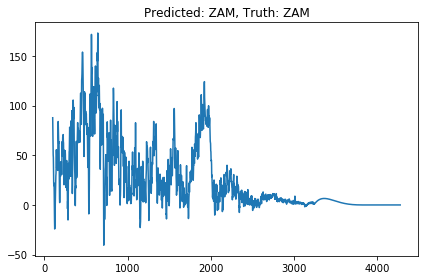

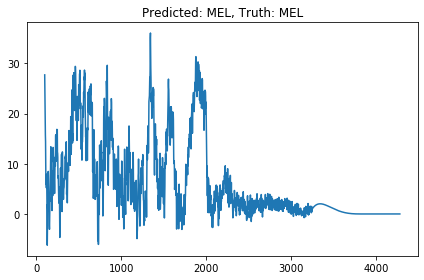

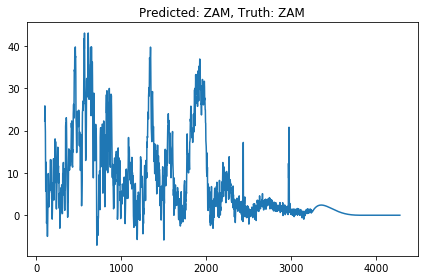

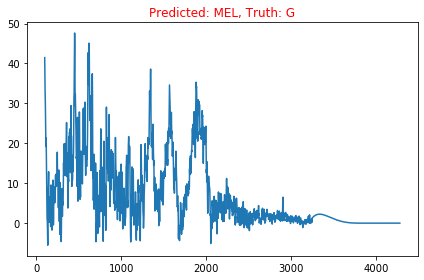

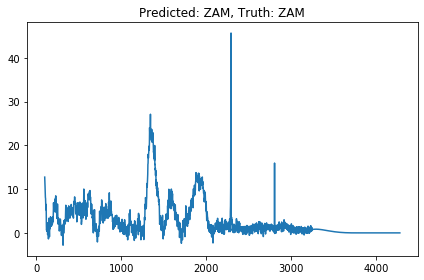

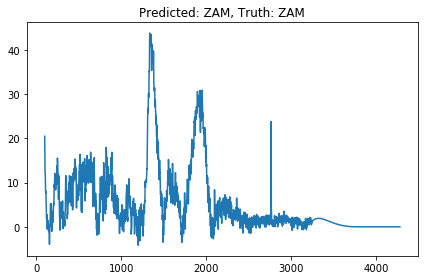

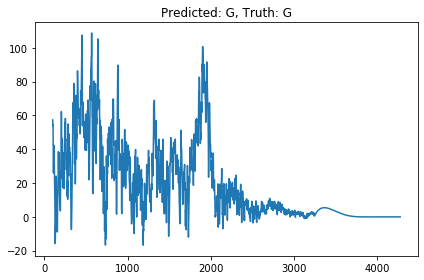

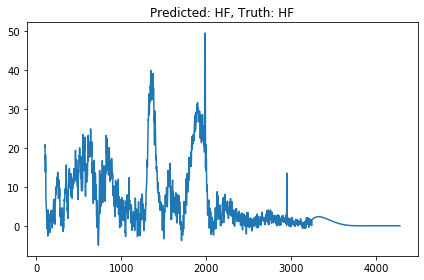

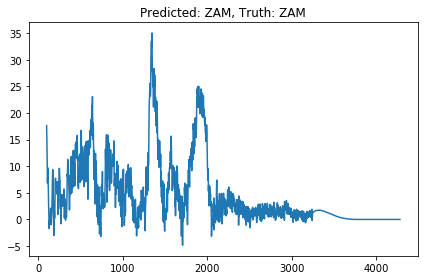

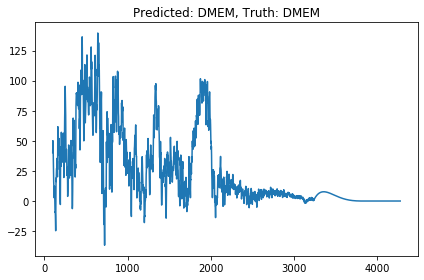

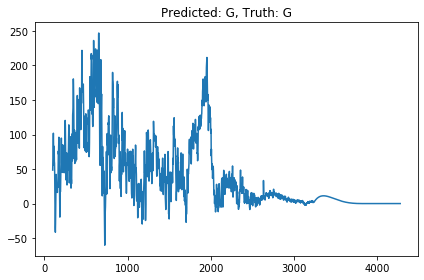

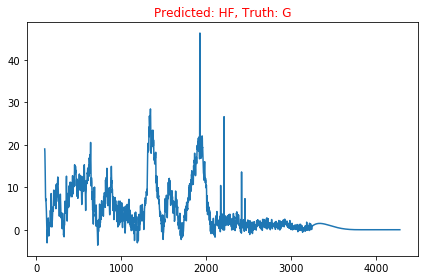

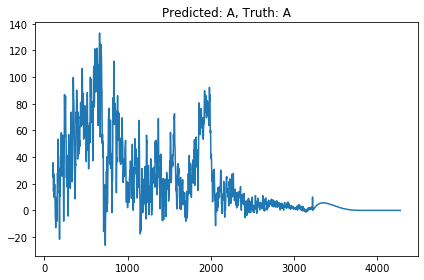

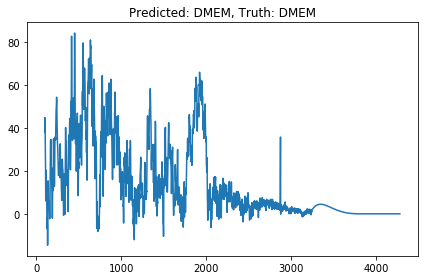

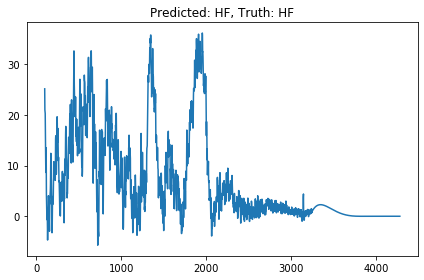

In [41]:
font_dict = {'color': 'black'}
for i in range(16): # Only do first 16
#     ax = plt.subplot(4, 4, i+1)
#     ax.axis('Off')
    plt.plot(np.linspace(100, 4278, 2090), x_test[i + page])
    prediction = le.inverse_transform([np.argmax(predictions[i + page])])[0]
    true_value = le.inverse_transform([np.argmax(y_test[i + page])])[0]
    font_dict['color'] = "black" if prediction == true_value else 'red'
    plt.title(
        f"Predicted: {prediction}, Truth: {true_value}", fontdict=font_dict)
    plt.tight_layout()
    plt.show()
page += 16